In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df1 = pd.read_csv('deliveries.csv')
df1.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [3]:
df2 = pd.read_csv('matches.csv')
df2.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

In [4]:
match1 = df2[(df2['team1'] == 'Rajasthan Royals') & (df2['team2'] == 'Chennai Super Kings')]
match2 = df2[(df2['team1'] == 'Chennai Super Kings') & (df2['team2'] == 'Rajasthan Royals')]

Match1 = Rajasthan Home Ground

Match2 = Chennai Home Ground

# Overall Chennai vs Rajasthan:

In [5]:
match = pd.concat((match1,match2))
match.head()

id  season       city        date             team1  \
109  110    2008    Chennai  2008-05-24  Rajasthan Royals   
151  152    2009  Kimberley  2009-05-09  Rajasthan Royals   
197  198    2010  Ahmedabad  2010-03-28  Rajasthan Royals   
275  276    2011    Chennai  2011-05-04  Rajasthan Royals   
333  334    2012    Chennai  2012-04-21  Rajasthan Royals   

                   team2       toss_winner toss_decision  result  dl_applied  \
109  Chennai Super Kings  Rajasthan Royals           bat  normal           0   
151  Chennai Super Kings  Rajasthan Royals           bat  normal           0   
197  Chennai Super Kings  Rajasthan Royals           bat  normal           0   
275  Chennai Super Kings  Rajasthan Royals           bat  normal           0   
333  Chennai Super Kings  Rajasthan Royals           bat  normal           0   

                  winner  win_by_runs  win_by_wickets player_of_match  \
109     Rajasthan Royals           10               0       JA Morkel   
151  Chennai Super Kings            0               7     S Badrinath   
197     Rajasthan Royals           17               0         NV Ojha   
275  Chennai Super Kings            0               8      MEK Hussey   
333  Chennai Super Kings            0               7    F du Plessis   

                               venue     umpire1          umpire2 umpire3  
109  MA Chidambaram Stadium, Chepauk   DJ Harper       SL Shastri     NaN  
151            De Beers Diamond Oval  GAV Baxter  HDPK Dharmasena     NaN  
197     Sardar Patel Stadium, Motera   SS Hazare       SJA Taufel     NaN  
275  MA Chidambaram Stadium, Chepauk   SS Hazare        RB Tiffin     NaN  
333  MA Chidambaram Stadium, Chepauk   Aleem Dar     BNJ Oxenford     NaN

Matches played between Chennai and Rajasthan.

In [6]:
match.shape

(21, 18)

In [7]:
match['winner'].value_counts()

Chennai Super Kings    14
Rajasthan Royals        7
Name: winner, dtype: int64

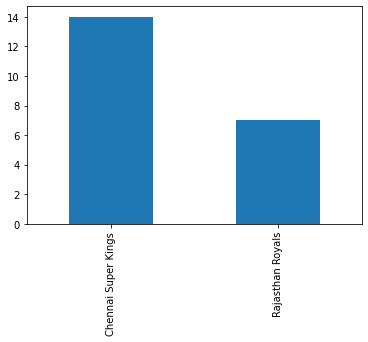

In [8]:
match['winner'].value_counts().plot.bar()
plt.show()

Chennai won 14 times and Rajasthan won 7 times against each other.

In [9]:
match['toss_winner'].value_counts()

Rajasthan Royals       14
Chennai Super Kings     7
Name: toss_winner, dtype: int64

In [10]:
match['toss_decision'].value_counts()

bat      12
field     9
Name: toss_decision, dtype: int64

In [11]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts()

Chennai Super Kings    4
Rajasthan Royals       4
Name: winner, dtype: int64

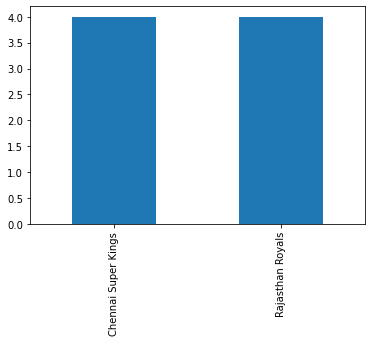

In [12]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts().plot.bar()
plt.show()

Both won the toss and won the match 4 times. So winning toss doesn't have much affect to winning the match.

In [13]:
ids = list(match['id'])
delivery = df1[df1['match_id'].isin(ids)]
delivery.head()

match_id  inning         batting_team      bowling_team  over  ball  \
19341        83       1  Chennai Super Kings  Rajasthan Royals     1     1   
19342        83       1  Chennai Super Kings  Rajasthan Royals     1     2   
19343        83       1  Chennai Super Kings  Rajasthan Royals     1     3   
19344        83       1  Chennai Super Kings  Rajasthan Royals     1     4   
19345        83       1  Chennai Super Kings  Rajasthan Royals     1     5   

          batsman non_striker         bowler  is_super_over  ...  bye_runs  \
19341    PA Patel  SP Fleming  Sohail Tanvir              0  ...         0   
19342    S Vidyut  SP Fleming  Sohail Tanvir              0  ...         0   
19343    S Vidyut  SP Fleming  Sohail Tanvir              0  ...         0   
19344  SP Fleming    S Vidyut  Sohail Tanvir              0  ...         0   
19345  SP Fleming    S Vidyut  Sohail Tanvir              0  ...         0   

       legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
19341            0            0             0             0           0   
19342            0            0             0             0           0   
19343            0            0             0             1           0   
19344            0            0             0             0           0   
19345            0            0             0             0           0   

       total_runs  player_dismissed dismissal_kind fielder  
19341           0          PA Patel            lbw     NaN  
19342           0               NaN            NaN     NaN  
19343           1               NaN            NaN     NaN  
19344           0               NaN            NaN     NaN  
19345           0        SP Fleming            lbw     NaN  

[5 rows x 21 columns]

Getting the details ball by ball of the matches played between Chennai and Rajasthan.

In [14]:
delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

## How many runs Rajasthan will score in first 6 overs:

In [15]:
total_runs_Rajasthan = delivery[(delivery['batting_team'] == 'Rajasthan Royals') & (delivery['over'] <= 6)]['total_runs'].count()
total_runs_Rajasthan

774

Rajasthan scored 774 runs in first 6 overs against Chennai.

In [16]:
avg_runs_Rajasthan = math.ceil(total_runs_Rajasthan/len(ids))
avg_runs_Rajasthan

37

Rajasthan scored 37 runs in an average per match in first 6 overs against Chennai.

In [17]:
total_runs_Rajasthan_batting_first = delivery[(delivery['batting_team'] == 'Rajasthan Royals') & (delivery['over'] <= 6) & (delivery['inning'] == 1)]['total_runs'].count()
total_runs_Rajasthan_batting_first

332

Rajasthan scored 332 runs in first 6 overs against Chennai while batting first.

In [18]:
total_matches_batting_first_Rajasthan = len(delivery[(delivery['batting_team'] == 'Rajasthan Royals') & (delivery['inning'] == 1)]['match_id'].unique())
total_matches_batting_first_Rajasthan

9

Total innings of Rajasthan batting first against Chennai.

In [19]:
avg_runs_Rajasthan_batting_first = math.ceil(total_runs_Rajasthan_batting_first/total_matches_batting_first_Rajasthan)
avg_runs_Rajasthan_batting_first

37

Rajasthan scored 37 runs in an average per match in first 6 overs against Chennai while batting first..

In [20]:
total_runs_Rajasthan_batting_second = delivery[(delivery['batting_team'] == 'Rajasthan Royals') & (delivery['over'] <= 6) & (delivery['inning'] == 2)]['total_runs'].count()
total_runs_Rajasthan_batting_second

442

Rajasthan scored 442 runs in first 6 overs against Chennai while batting second.

In [21]:
total_matches_batting_second_Rajasthan = len(delivery[(delivery['batting_team'] == 'Rajasthan Royals') & (delivery['inning'] == 2)]['match_id'].unique())
total_matches_batting_second_Rajasthan

12

In [22]:
avg_runs_Rajasthan_batting_second = math.ceil(total_runs_Rajasthan_batting_second/total_matches_batting_second_Rajasthan)
avg_runs_Rajasthan_batting_second

37

Rajasthan scored 37 runs in an average per match in first 6 overs against Chennai while batting second.

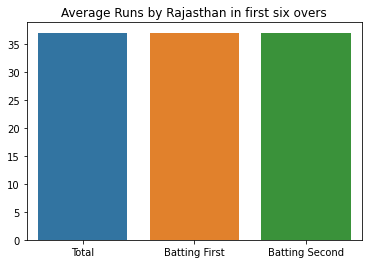

In [23]:
average_runs_Rajasthan = pd.Series([avg_runs_Rajasthan,avg_runs_Rajasthan_batting_first,avg_runs_Rajasthan_batting_second],index = ['Total','Batting First','Batting Second'])
sns.barplot(x = average_runs_Rajasthan.index , y = average_runs_Rajasthan)
plt.title('Average Runs by Rajasthan in first six overs')
plt.show()

Rajasthan scored 37 runs in an average per match against Chennai whether batting first or second.

## Deepak Chahar's Economoy Rate:

In [47]:
economy_rate_list = []
for j in ids:
    runs = list(delivery[(delivery['match_id'] == j) & (delivery['bowler'] == 'DL Chahar')]['total_runs'])
    bye_runs = list(delivery[(delivery['match_id'] == j) & (delivery['bowler'] == 'DL Chahar')]['bye_runs'])
    legbye_runs = list(delivery[(delivery['match_id'] == j) & (delivery['bowler'] == 'DL Chahar')]['legbye_runs'])
    wide_runs = list(delivery[(delivery['match_id'] == j) & (delivery['bowler'] == 'DL Chahar')]['wide_runs'])
    noball_runs = list(delivery[(delivery['match_id'] == j) & (delivery['bowler'] == 'DL Chahar')]['noball_runs'])
    s = 0
    bye = 0
    legbye = 0
    noball = 0
    wideball = 0
    for i in range(0,len(runs)):
        s += runs[i]
        bye += bye_runs[i]
        legbye += legbye_runs[i]
        if noball_runs[i] > 0:
            noball += 1
        if wide_runs[i] > 0:
            wideball += 1
    total_balls = len(runs) - noball - wideball
    total_runs = s - bye - legbye
    if total_balls > 0:
        economy_rate = (total_runs/total_balls)*6
    else:
        economy_rate = 0
    if economy_rate > 0:
        economy_rate_list.append(economy_rate)
print(economy_rate_list)

[8.5, 8.5, 5.0]


Deepak Chahar played only 3 matches against Rajasthan till now and these are his economy rates. 

In [48]:
avg_economy_rate = np.mean(economy_rate_list)
avg_economy_rate

7.333333333333333

Deepak Chahar's average economy rate is 7.33 per match against Rajasthan.

In [52]:
economy_rate_list_overall = []
total_ids = list(df1[df1['bowler'] == 'DL Chahar']['match_id'].unique())
for j in total_ids:
    runs = list(df1[(df1['match_id'] == j) & (df1['bowler'] == 'DL Chahar')]['total_runs'])
    bye_runs = list(df1[(df1['match_id'] == j) & (df1['bowler'] == 'DL Chahar')]['bye_runs'])
    legbye_runs = list(df1[(df1['match_id'] == j) & (df1['bowler'] == 'DL Chahar')]['legbye_runs'])
    wide_runs = list(df1[(df1['match_id'] == j) & (df1['bowler'] == 'DL Chahar')]['wide_runs'])
    noball_runs = list(df1[(df1['match_id'] == j) & (df1['bowler'] == 'DL Chahar')]['noball_runs'])
    s = 0
    bye = 0
    legbye = 0
    noball = 0
    wideball = 0
    for i in range(0,len(runs)):
        s += runs[i]
        bye += bye_runs[i]
        legbye += legbye_runs[i]
        if noball_runs[i] > 0:
            noball += 1
        if wide_runs[i] > 0:
            wideball += 1
    total_balls_overall = len(runs) - noball - wideball
    total_runs_overall = s - bye - legbye
    if total_balls_overall > 0:
        economy_rate_overall = (total_runs_overall/total_balls_overall)*6
    else:
        economy_rate_overall = 0
    if economy_rate_overall > 0:
        economy_rate_list_overall.append(economy_rate_overall)
print(economy_rate_list_overall)

[10.5, 11.666666666666666, 9.0, 6.5, 9.333333333333334, 4.666666666666667, 19.0, 12.666666666666668, 8.5, 3.75, 10.0, 9.230769230769232, 5.25, 8.333333333333332, 8.5, 8.25, 6.75, 4.5, 5.25, 5.0, 7.333333333333334, 10.75, 4.888888888888888, 8.5, 9.0, 10.333333333333334, 6.75, 8.0, 11.75, 10.666666666666666, 7.0, 8.571428571428571, 7.25, 6.75]


Deepak Chahar's economy rate against all teams.

In [53]:
avg_economy_rate_overall = np.mean(economy_rate_list_overall)
avg_economy_rate_overall

8.358561373267255

Deepak Chahar's average economy rate is 8.35 per match against all the teams.

In [54]:
economy_rate_list_overall_bowling_first = []
total_ids = list(df1[df1['bowler'] == 'DL Chahar']['match_id'].unique())
for j in total_ids:
    runs = list(df1[(df1['match_id'] == j) & (df1['bowler'] == 'DL Chahar') & (df1['inning'] == 1)]['total_runs'])
    bye_runs = list(df1[(df1['match_id'] == j) & (df1['bowler'] == 'DL Chahar') & (df1['inning'] == 1)]['bye_runs'])
    legbye_runs = list(df1[(df1['match_id'] == j) & (df1['bowler'] == 'DL Chahar') & (df1['inning'] == 1)]['legbye_runs'])
    wide_runs = list(df1[(df1['match_id'] == j) & (df1['bowler'] == 'DL Chahar') & (df1['inning'] == 1)]['wide_runs'])
    noball_runs = list(df1[(df1['match_id'] == j) & (df1['bowler'] == 'DL Chahar') & (df1['inning'] == 1)]['noball_runs'])
    s = 0
    bye = 0
    legbye = 0
    noball = 0
    wideball = 0
    for i in range(0,len(runs)):
        s += runs[i]
        bye += bye_runs[i]
        legbye += legbye_runs[i]
        if noball_runs[i] > 0:
            noball += 1
        if wide_runs[i] > 0:
            wideball += 1
    total_balls_overall_bowling_first = len(runs) - noball - wideball
    total_runs_overall_bowling_first = s - bye - legbye
    if total_balls_overall_bowling_first > 0:
        economy_rate_overall_bowling_first = (s/total_balls_overall_bowling_first)*6
    else:
        economy_rate_overall_bowling_first = 0
    if economy_rate_overall_bowling_first > 0:
        economy_rate_list_overall_bowling_first.append(economy_rate_overall_bowling_first)
print(economy_rate_list_overall_bowling_first)

[10.5, 12.0, 6.5, 9.666666666666668, 4.666666666666667, 19.0, 12.666666666666668, 10.0, 5.75, 8.333333333333332, 8.75, 8.25, 6.75, 4.5, 5.25, 7.666666666666666, 5.111111111111111, 8.75, 9.0, 7.0, 8.0, 11.75, 7.25, 6.75]


Deepak Chahar's economy rate against all teams while bowling in first inning.

In [55]:
avg_economy_rate_overall_bowling_first = np.mean(economy_rate_list_overall_bowling_first)
avg_economy_rate_overall_bowling_first

8.494212962962964

Deepak Chahar's average economy rate is 8.49 per match against all the teams while bowling in first inning.

In [56]:
economy_rate_list_overall_bowling_second = []
total_ids = list(df1[df1['bowler'] == 'DL Chahar']['match_id'].unique())
for j in total_ids:
    runs = list(df1[(df1['match_id'] == j) & (df1['bowler'] == 'DL Chahar') & (df1['inning'] == 2)]['total_runs'])
    bye_runs = list(df1[(df1['match_id'] == j) & (df1['bowler'] == 'DL Chahar') & (df1['inning'] == 2)]['bye_runs'])
    legbye_runs = list(df1[(df1['match_id'] == j) & (df1['bowler'] == 'DL Chahar') & (df1['inning'] == 2)]['legbye_runs'])
    wide_runs = list(df1[(df1['match_id'] == j) & (df1['bowler'] == 'DL Chahar') & (df1['inning'] == 2)]['wide_runs'])
    noball_runs = list(df1[(df1['match_id'] == j) & (df1['bowler'] == 'DL Chahar') & (df1['inning'] == 2)]['noball_runs'])
    s = 0
    bye = 0
    legbye = 0
    noball = 0
    wideball = 0
    for i in range(0,len(runs)):
        s += runs[i]
        bye += bye_runs[i]
        legbye += legbye_runs[i]
        if noball_runs[i] > 0:
            noball += 1
        if wide_runs[i] > 0:
            wideball += 1
    total_balls_overall_bowling_second = len(runs) - noball - wideball
    total_runs_overall_bowling_second = s - bye - legbye
    if total_balls_overall_bowling_second > 0:
        economy_rate_overall_bowling_second = (s/total_balls_overall_bowling_second)*6
    else:
        economy_rate_overall_bowling_second = 0
    if economy_rate_overall_bowling_second > 0:
        economy_rate_list_overall_bowling_second.append(economy_rate_overall_bowling_second)
print(economy_rate_list_overall_bowling_second)

[9.0, 8.5, 3.75, 9.230769230769232, 5.0, 10.75, 10.333333333333334, 10.666666666666666, 7.0, 8.571428571428571]


Deepak Chahar's economy rate against all teams while bowling in second inning.

In [57]:
avg_economy_rate_overall_bowling_second = np.mean(economy_rate_list_overall_bowling_second)
avg_economy_rate_overall_bowling_second

8.28021978021978

Deepak Chahar's average economy rate is 8.28 per match against all the teams while bowling in second inning.

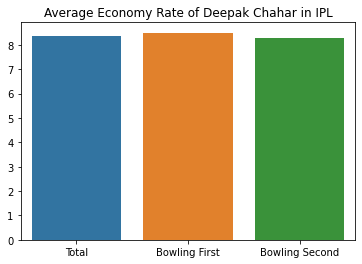

In [58]:
average_economy_rate = pd.Series([avg_economy_rate_overall,avg_economy_rate_overall_bowling_first,avg_economy_rate_overall_bowling_second],index = ['Total','Bowling First','Bowling Second'])
sns.barplot(x = average_economy_rate.index , y = average_economy_rate)
plt.title('Average Economy Rate of Deepak Chahar in IPL')
plt.show()

Deepak Chahar's average economy rate is higher while bowling first than bowling second in IPL.

## Jofra Archer's wickets in death overs:

In [59]:
total_wickets_Jofra_death_overs = delivery[(delivery['bowler'] == 'J Archer') & (delivery['over'] >= 16) & (delivery['dismissal_kind'] != 'run out')]['player_dismissed'].count()
total_wickets_Jofra_death_overs

1

Jofra Archer took only one wicket against Chennai in death overs till now.

In [60]:
total_matches_against_Chennai = len(delivery[delivery['bowler'] == 'J Archer']['match_id'].unique())
total_matches_against_Chennai

3

He played only 3 matches against Chennai.

In [62]:
total_wickets_Jofra_death_overs_overall = df1[(df1['bowler'] == 'J Archer') & (df1['over'] >= 16) & (df1['dismissal_kind'] != 'run out')]['player_dismissed'].count()
total_wickets_Jofra_death_overs_overall

14

Jofra Archer took 14 wickets in death overs against all the teams till now.

In [63]:
total_matches_overall = len(df1[df1['bowler'] == 'J Archer']['match_id'].unique())
total_matches_overall

21

He played 21 matches in total.

In [64]:
avg_wickets_overall = total_wickets_Jofra_death_overs_overall/total_matches_overall
avg_wickets_overall

0.6666666666666666

He took 14 wickets in 21 matches in death overs in IPL , so b=his average wickets per match is less than one.

## Steve Smith's Strike rate:

In [65]:
strike_rate_list = []
for j in ids:
    runs = list(delivery[(delivery['match_id'] == j) & (delivery['batsman'] == 'SPD Smith')]['batsman_runs'])
    wide_runs = list(delivery[(delivery['match_id'] == j) & (delivery['batsman'] == 'SPD Smith')]['wide_runs'])
    s = 0
    wide = 0
    for i in range(0,len(runs)):
        s += runs[i]
        if wide_runs[i] > 0:
            wide += 1
    total_balls = len(runs) - wide
    if total_balls > 0:
        strike_rate = (s/total_balls)*100
    else:
        strike_rate = 0
    if strike_rate > 0:
        strike_rate_list.append(strike_rate)
print(strike_rate_list)

[112.5, 68.18181818181817, 95.0, 85.71428571428571, 66.66666666666666, 103.33333333333334]


Steve Smith's strike rate against Chennai till now.

In [66]:
avg_strike_rate = np.mean(strike_rate_list)
avg_strike_rate

88.56601731601732

Steve Smith's average strike rate against Chennai.

In [67]:
strike_rate_list_overall = []
total_ids1 = list(df1[df1['batsman'] == 'SPD Smith']['match_id'].unique())
for j in total_ids1:
    runs = list(df1[(df1['match_id'] == j) & (df1['batsman'] == 'SPD Smith')]['batsman_runs'])
    wide_runs = list(df1[(df1['match_id'] == j) & (df1['batsman'] == 'SPD Smith')]['wide_runs'])
    s = 0
    wide = 0
    for i in range(0,len(runs)):
        s += runs[i]
        if wide_runs[i] > 0:
            wide += 1
    total_balls = len(runs) - wide
    if total_balls > 0:
        strike_rate = (s/total_balls)*100
    else:
        strike_rate = 0
    if strike_rate > 0:
        strike_rate_list_overall.append(strike_rate)
print(strike_rate_list_overall)

[155.55555555555557, 96.29629629629629, 153.57142857142858, 112.5, 128.57142857142858, 141.66666666666669, 137.83783783783784, 140.625, 200.0, 100.0, 87.17948717948718, 118.75, 83.33333333333334, 50.0, 102.0, 121.875, 208.33333333333334, 100.0, 200.0, 114.28571428571428, 109.52380952380953, 261.53846153846155, 200.0, 174.07407407407408, 33.33333333333333, 87.5, 81.81818181818183, 96.0, 119.35483870967742, 243.75, 68.0, 66.66666666666666, 132.25806451612902, 212.5, 89.74358974358975, 100.0, 180.0, 95.0, 171.42857142857142, 150.0, 66.66666666666666, 228.57142857142856, 112.5, 143.47826086956522, 111.11111111111111, 149.0566037735849, 130.0, 85.71428571428571, 166.66666666666669, 110.71428571428572, 114.99999999999999, 170.0, 66.66666666666666, 127.27272727272727, 92.3076923076923, 83.33333333333334, 146.15384615384613, 133.33333333333331, 110.71428571428572, 127.77777777777777, 187.03703703703704, 195.65217391304347, 150.0, 103.33333333333334, 125.80645161290323, 133.89830508474577, 68.1

Steve Smith's strike rate of every match he played in IPL.

In [68]:
avg_strike_rate_overall = np.mean(strike_rate_list_overall)
avg_strike_rate_overall

127.76310783046827

Steve Smith's average strike rate against all teams.

In [69]:
strike_rate_list_overall_batting_first = []
total_ids1 = list(df1[df1['batsman'] == 'SPD Smith']['match_id'].unique())
for j in total_ids1:
    runs = list(df1[(df1['match_id'] == j) & (df1['batsman'] == 'SPD Smith') & (df1['inning'] == 1)]['batsman_runs'])
    wide_runs = list(df1[(df1['match_id'] == j) & (df1['batsman'] == 'SPD Smith') & (df1['inning'] == 1)]['wide_runs'])
    s = 0
    wide = 0
    for i in range(0,len(runs)):
        s += runs[i]
        if wide_runs[i] > 0:
            wide += 1
    total_balls = len(runs) - wide
    if total_balls > 0:
        strike_rate = (s/total_balls)*100
    else:
        strike_rate = 0
    if strike_rate > 0:
        strike_rate_list_overall_batting_first.append(strike_rate)
print(strike_rate_list_overall_batting_first)

[96.29629629629629, 153.57142857142858, 112.5, 141.66666666666669, 137.83783783783784, 140.625, 87.17948717948718, 50.0, 121.875, 208.33333333333334, 100.0, 114.28571428571428, 261.53846153846155, 81.81818181818183, 243.75, 66.66666666666666, 180.0, 172.72727272727272, 150.0, 112.5, 143.47826086956522, 110.71428571428572, 127.27272727272727, 83.33333333333334, 146.15384615384613, 110.71428571428572, 187.03703703703704, 195.65217391304347, 133.89830508474577, 68.18181818181817, 159.375]


Steve Smith's strike rate of every match he played in IPL while batting in first inning.

In [70]:
avg_strike_rate_overall_batting_first = np.mean(strike_rate_list_overall_batting_first)
avg_strike_rate_overall_batting_first

135.4510458127753

Steve Smith's average strike rate against all teams while batting in first inning.

In [71]:
strike_rate_list_overall_batting_second = []
total_ids1 = list(df1[df1['batsman'] == 'SPD Smith']['match_id'].unique())
for j in total_ids1:
    runs = list(df1[(df1['match_id'] == j) & (df1['batsman'] == 'SPD Smith') & (df1['inning'] == 2)]['batsman_runs'])
    wide_runs = list(df1[(df1['match_id'] == j) & (df1['batsman'] == 'SPD Smith') & (df1['inning'] == 2)]['wide_runs'])
    s = 0
    wide = 0
    for i in range(0,len(runs)):
        s += runs[i]
        if wide_runs[i] > 0:
            wide += 1
    total_balls = len(runs) - wide
    if total_balls > 0:
        strike_rate = (s/total_balls)*100
    else:
        strike_rate = 0
    if strike_rate > 0:
        strike_rate_list_overall_batting_second.append(strike_rate)
print(strike_rate_list_overall_batting_second)

[155.55555555555557, 128.57142857142858, 200.0, 100.0, 118.75, 83.33333333333334, 102.0, 200.0, 109.52380952380953, 200.0, 174.07407407407408, 33.33333333333333, 87.5, 96.0, 119.35483870967742, 68.0, 132.25806451612902, 212.5, 89.74358974358975, 100.0, 95.0, 66.66666666666666, 228.57142857142856, 111.11111111111111, 149.0566037735849, 130.0, 85.71428571428571, 114.99999999999999, 170.0, 66.66666666666666, 92.3076923076923, 133.33333333333331, 127.77777777777777, 150.0, 103.33333333333334, 125.80645161290323, 80.0, 122.91666666666667, 33.33333333333333, 137.5]


Steve Smith's strike rate of every match he played in IPL while batting in second inning.

In [72]:
avg_strike_rate_overall_batting_second = np.mean(strike_rate_list_overall_batting_second)
avg_strike_rate_overall_batting_second

120.86483445574285

Steve Smith's average strike rate against all teams while batting in second inning.

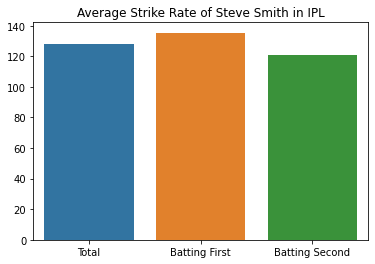

In [73]:
average_strike_rate = pd.Series([avg_strike_rate_overall,avg_strike_rate_overall_batting_first,avg_strike_rate_overall_batting_second],index = ['Total','Batting First','Batting Second'])
sns.barplot(x = average_strike_rate.index , y = average_strike_rate)
plt.title('Average Strike Rate of Steve Smith in IPL')
plt.show()

So Steve Smith's Strike Rate is higher when he batted in first inning.